# VacationPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os

# Import API key
from api_keys import g_key

### Store Part I results into DataFrame
* Load the csv exported in Part I to a DataFrame

In [2]:
# Read csv file to a data frame
file = "../output_data/weather.csv"

cities_df = pd.read_csv(file)
print(cities_df)
cities_df = cities_df.dropna()
cities_df

                     City  Latitude  Longitude  Max Temperature  Humidity  \
0                    Sola    -13.88     167.55            81.21      84.0   
1                 Limoges     45.75       1.33            68.00      72.0   
2                Cidreira    -30.18     -50.21            62.64      69.0   
3             Kattivakkam     13.22      80.32            87.80      74.0   
4    Vila Franca Do Campo     37.72     -25.43            66.20      72.0   
..                    ...       ...        ...              ...       ...   
622             Solikamsk     59.62      56.77            54.07      57.0   
623                Ossora     59.24     163.07            38.12      81.0   
624             Morondava    -20.28      44.28            76.35      67.0   
625                 Gweru    -19.45      29.82            60.40      39.0   
626              Menongue    -14.66      17.69            72.36      30.0   

     Cloudiness  Wind Speed Country      DateTime  
0          99.0       1

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,DateTime
0,Sola,-13.88,167.55,81.21,84.0,99.0,19.51,VU,1.591198e+09
1,Limoges,45.75,1.33,68.00,72.0,33.0,8.05,FR,1.591198e+09
2,Cidreira,-30.18,-50.21,62.64,69.0,21.0,4.52,BR,1.591198e+09
3,Kattivakkam,13.22,80.32,87.80,74.0,20.0,11.41,IN,1.591198e+09
4,Vila Franca Do Campo,37.72,-25.43,66.20,72.0,40.0,14.99,PT,1.591198e+09
...,...,...,...,...,...,...,...,...,...
622,Solikamsk,59.62,56.77,54.07,57.0,0.0,2.82,RU,1.591198e+09
623,Ossora,59.24,163.07,38.12,81.0,71.0,3.89,RU,1.591198e+09
624,Morondava,-20.28,44.28,76.35,67.0,0.0,9.62,MG,1.591198e+09
625,Gweru,-19.45,29.82,60.40,39.0,0.0,8.84,ZW,1.591198e+09


In [3]:
cities_df.describe()

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,DateTime
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,21.757158,14.248295,67.561954,67.554174,52.424512,7.971261,1.591198e+09
std,33.212355,90.222177,16.404307,20.508877,37.049585,5.236098,6.750767e+01
min,-54.800000,-175.200000,28.400000,7.000000,0.000000,0.040000,1.591198e+09
25%,-6.380000,-66.475000,53.600000,56.000000,19.500000,4.090000,1.591198e+09
50%,27.150000,16.490000,70.480000,71.000000,58.000000,6.930000,1.591198e+09
75%,49.930000,90.945000,80.385000,83.000000,90.000000,10.290000,1.591198e+09
max,78.220000,178.420000,111.150000,100.000000,100.000000,28.070000,1.591198e+09


### Humidity Heatmap
* Configure gmaps.
* Use the Lat and Lng as locations and Humidity as the weight.
* Add Heatmap layer to map.

In [4]:
# Configure gmaps
gmaps.configure(api_key=g_key)

figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

In [5]:
#define coordinates from cities_df
coordinates = []

for index, row in cities_df.iterrows():
    lat = row["Latitude"]
    lon = row["Longitude"]
    coordinates.append((lat, lon))

coordinates

[(-13.88, 167.55),
 (45.75, 1.33),
 (-30.18, -50.21),
 (13.22, 80.32),
 (37.72, -25.43),
 (-42.88, 147.33),
 (64.38, -173.3),
 (-53.15, -70.92),
 (69.45, -133.04),
 (42.25, -75.83),
 (71.29, -156.79),
 (64.84, -147.72),
 (-9.8, -139.03),
 (26.18, 127.76),
 (-46.6, 168.33),
 (22.29, 114.16),
 (-13.7, -76.22),
 (22.08, -159.32),
 (-21.2, -175.2),
 (31.67, 38.66),
 (42.6, -73.97),
 (35.84, -90.7),
 (-10.93, 35.02),
 (39.05, -27.98),
 (49.78, -74.85),
 (36.21, -115.98),
 (-23.12, -134.97),
 (65.61, -37.64),
 (57.24, 37.84),
 (66.0, 111.5),
 (-24.79, -50.01),
 (12.18, 125.51),
 (73.51, 80.55),
 (18.33, 105.9),
 (-33.65, 115.33),
 (-46.19, 168.86),
 (19.22, -104.7),
 (41.14, -73.36),
 (50.41, 80.23),
 (-42.78, 147.06),
 (28.66, -17.92),
 (33.08, -16.33),
 (-12.07, 134.27),
 (43.8, 87.6),
 (-20.01, 57.66),
 (-43.3, -65.1),
 (52.93, 78.58),
 (20.93, -17.03),
 (-3.32, 114.59),
 (-54.8, -68.3),
 (55.23, 61.72),
 (47.67, -52.73),
 (33.19, -82.53),
 (12.63, 80.17),
 (41.81, 126.91),
 (-16.7, -151.

In [6]:
# Map humidity in all cities in list
fig = gmaps.figure(center=(19.84, 34.84), zoom_level=2)

heat_layer = gmaps.heatmap_layer(coordinates, weights=cities_df["Humidity"], 
                                 dissipating=False, max_intensity=cities_df["Humidity"].max(),
                                 point_radius = 1)

# Add the layer to the map
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

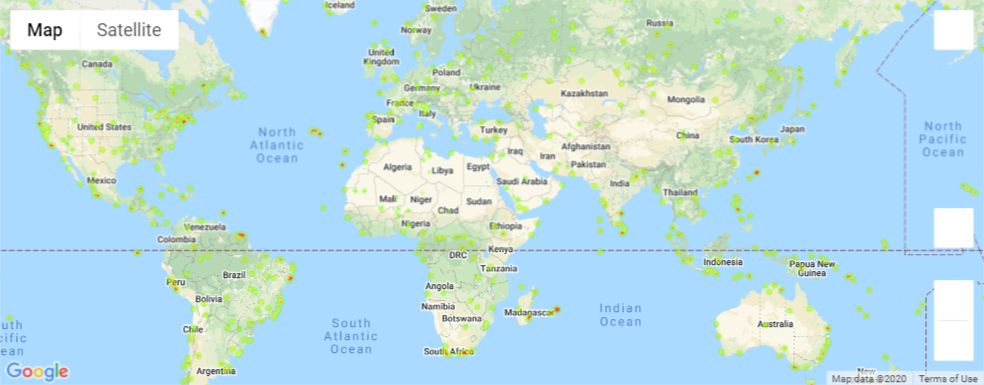

### Create new DataFrame fitting weather criteria
* Narrow down the cities to fit weather conditions.
* Drop any rows will null values.

In [7]:
#Narrow cities list by specified weather conditions
ideal_df = cities_df.loc[(cities_df['Max Temperature'] < 80) & (cities_df['Max Temperature'] > 70) 
                         & (cities_df['Wind Speed'] < 10) & (cities_df['Cloudiness'] == 0)]
ideal_df = ideal_df[["City","Country","Latitude","Longitude", "Max Temperature", "Humidity", "Cloudiness", "Wind Speed"]]
ideal_df

,City,Country,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
176,Tukrah,LY,32.53,20.58,70.45,55.0,0.0,9.93
195,Chokwe,MZ,-24.53,32.98,70.48,45.0,0.0,4.23
203,Guerrero Negro,MX,27.98,-114.06,73.71,53.0,0.0,7.29
207,Pedregulho,BR,-20.26,-47.48,76.87,49.0,0.0,2.46
233,Carnarvon,AU,-24.87,113.63,73.85,42.0,0.0,8.70
280,Fort-Shevchenko,KZ,44.51,50.26,73.24,62.0,0.0,7.83
392,Mmabatho,ZA,-25.85,25.63,71.60,33.0,0.0,3.36
410,San Vicente,AR,-26.62,-54.13,71.22,34.0,0.0,2.28
466,Gat,IL,31.61,34.76,78.01,48.0,0.0,1.01
516,Itacurubi Del Rosario,PY,-24.50,-56.68,73.15,50.0,0.0,5.66


### Hotel Map
* Store into variable named `hotel_df`.
* Add a "Hotel Name" column to the DataFrame.
* Set parameters to search for hotels with 5000 meters.
* Hit the Google Places API for each city's coordinates.
* Store the first Hotel result into the DataFrame.
* Plot markers on top of the heatmap.

In [8]:
#Create data frame to add one hotel name for each city
hotels_df = pd.DataFrame(ideal_df)
hotels_df["Hotel Name"] = ""
hotel_df = hotels_df.reset_index(drop=True)
hotel_df

,City,Country,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Hotel Name
0,Tukrah,LY,32.53,20.58,70.45,55.0,0.0,9.93,
1,Chokwe,MZ,-24.53,32.98,70.48,45.0,0.0,4.23,
2,Guerrero Negro,MX,27.98,-114.06,73.71,53.0,0.0,7.29,
3,Pedregulho,BR,-20.26,-47.48,76.87,49.0,0.0,2.46,
4,Carnarvon,AU,-24.87,113.63,73.85,42.0,0.0,8.70,
5,Fort-Shevchenko,KZ,44.51,50.26,73.24,62.0,0.0,7.83,
6,Mmabatho,ZA,-25.85,25.63,71.60,33.0,0.0,3.36,
7,San Vicente,AR,-26.62,-54.13,71.22,34.0,0.0,2.28,
8,Gat,IL,31.61,34.76,78.01,48.0,0.0,1.01,
9,Itacurubi Del Rosario,PY,-24.50,-56.68,73.15,50.0,0.0,5.66,


In [9]:
# find the closest hotel to locations
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

params = {
    "location": "",
    "radius": 5000,
    "type": "lodging",
    "key": g_key}


# use iterrows to iterate through pandas dataframe
for index, row in hotel_df.iterrows():

    # get city location from hotel_df
    lat = row["Latitude"]
    lon = row["Longitude"]
    print(f"{lat}, {lon}")
    params["location"] = f"{lat},{lon}"

    response = requests.get(base_url, params=params).json()
    # extract results
    results = response["results"]
    
    try:
        print(f"The closest hotel to {row['City']} is {results[0]['name']}.")
        # Add the first result returned for name to the "Hotel Name" series in hotel_df
        hotel_df.loc[index, "Hotel Name"] = results[0]["name"]

        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        # If no hotel names are found indicate results in "Hotel Name" series in hotel_df
        hotel_df.loc[index, "Hotel Name"] = "No Results Returned"
        
    print("------------")
hotel_df


32.53, 20.58
The closest hotel to Tukrah is استراحة لاقروتا.
------------
-24.53, 32.98
The closest hotel to Chokwe is Complexo Sonho Real.
------------
27.98, -114.06
The closest hotel to Guerrero Negro is Casa Laguna, Bed & Breakfast.
------------
-20.26, -47.48
The closest hotel to Pedregulho is AGORA.
------------
-24.87, 113.63
The closest hotel to Carnarvon is Hospitality Carnarvon.
------------
44.51, 50.26
The closest hotel to Fort-Shevchenko is Oasis hotel Bautino.
------------
-25.85, 25.63
The closest hotel to Mmabatho is Mahikeng Guest Apartments.
------------
-26.62, -54.13
The closest hotel to San Vicente is Complejo Turístico Farelluk.
------------
31.61, 34.76
The closest hotel to Gat is רגע בנחת.
------------
-24.5, -56.68
Missing field/result... skipping.
------------
36.1, 120.37
The closest hotel to Qingdao is Holiday Inn Qingdao City Centre.
------------
-20.28, 44.28
The closest hotel to Morondava is La Case Bambou.
------------


,City,Country,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Hotel Name
0,Tukrah,LY,32.53,20.58,70.45,55.0,0.0,9.93,استراحة لاقروتا
1,Chokwe,MZ,-24.53,32.98,70.48,45.0,0.0,4.23,Complexo Sonho Real
2,Guerrero Negro,MX,27.98,-114.06,73.71,53.0,0.0,7.29,"Casa Laguna, Bed & Breakfast"
3,Pedregulho,BR,-20.26,-47.48,76.87,49.0,0.0,2.46,AGORA
4,Carnarvon,AU,-24.87,113.63,73.85,42.0,0.0,8.70,Hospitality Carnarvon
5,Fort-Shevchenko,KZ,44.51,50.26,73.24,62.0,0.0,7.83,Oasis hotel Bautino
6,Mmabatho,ZA,-25.85,25.63,71.60,33.0,0.0,3.36,Mahikeng Guest Apartments
7,San Vicente,AR,-26.62,-54.13,71.22,34.0,0.0,2.28,Complejo Turístico Farelluk
8,Gat,IL,31.61,34.76,78.01,48.0,0.0,1.01,רגע בנחת
9,Itacurubi Del Rosario,PY,-24.50,-56.68,73.15,50.0,0.0,5.66,No Results Returned


In [10]:
# Narrow information to select data series and eliminate cities with no hotels
locations_df = hotel_df[["Latitude", "Longitude", "City", "Country", "Hotel Name", "Humidity"]].loc[hotel_df["Hotel Name"] != "No Results Returned"]
locations_df

,Latitude,Longitude,City,Country,Hotel Name,Humidity
0,32.53,20.58,Tukrah,LY,استراحة لاقروتا,55.0
1,-24.53,32.98,Chokwe,MZ,Complexo Sonho Real,45.0
2,27.98,-114.06,Guerrero Negro,MX,"Casa Laguna, Bed & Breakfast",53.0
3,-20.26,-47.48,Pedregulho,BR,AGORA,49.0
4,-24.87,113.63,Carnarvon,AU,Hospitality Carnarvon,42.0
5,44.51,50.26,Fort-Shevchenko,KZ,Oasis hotel Bautino,62.0
6,-25.85,25.63,Mmabatho,ZA,Mahikeng Guest Apartments,33.0
7,-26.62,-54.13,San Vicente,AR,Complejo Turístico Farelluk,34.0
8,31.61,34.76,Gat,IL,רגע בנחת,48.0
10,36.10,120.37,Qingdao,CN,Holiday Inn Qingdao City Centre,60.0


In [11]:
# Get coordinates for select cities
locations = locations_df[["Latitude", "Longitude"]]
# Create map
fig = gmaps.figure(center=(19.84, 34.84), zoom_level=2)
# Add heat layer using humidity
heat_layer = gmaps.heatmap_layer(locations, weights=locations_df["Humidity"], 
                                 dissipating=False, max_intensity=locations_df["Humidity"].max(),
                                 point_radius = 1)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

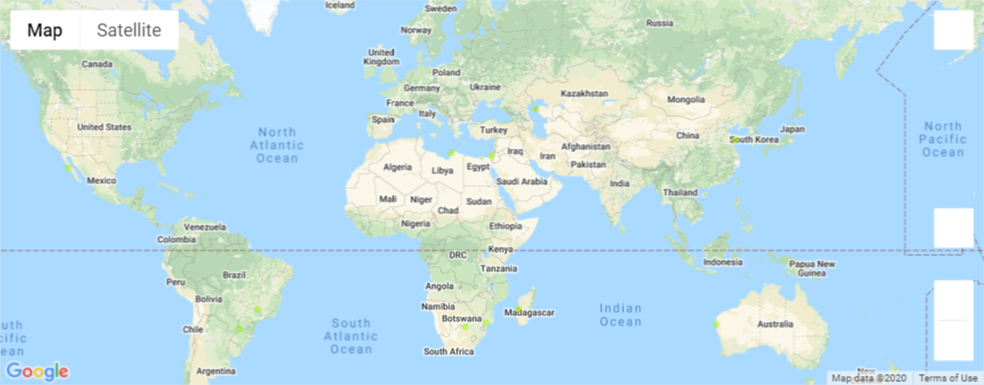

In [12]:
# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
hotel_info = [info_box_template.format(**row) for index, row in locations_df.iterrows()]
locations = locations_df[["Latitude", "Longitude"]]
locations

,Latitude,Longitude
0,32.53,20.58
1,-24.53,32.98
2,27.98,-114.06
3,-20.26,-47.48
4,-24.87,113.63
5,44.51,50.26
6,-25.85,25.63
7,-26.62,-54.13
8,31.61,34.76
10,36.10,120.37


In [13]:
# Add marker layer on top of heat map
marker = gmaps.marker_layer(locations, info_box_content=hotel_info)

fig.add_layer(marker)

fig
# Click on markers to display hotel information

Figure(layout=FigureLayout(height='420px'))

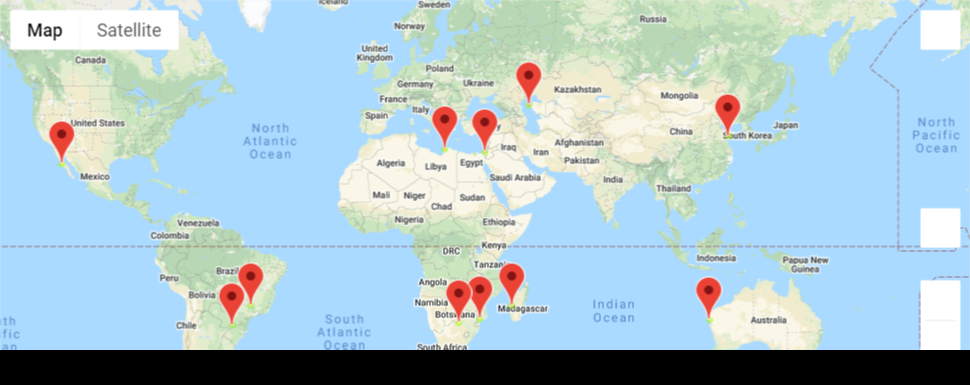